<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Deep-Convolutional-Neural-Network-(DCNN)" data-toc-modified-id="Deep-Convolutional-Neural-Network-(DCNN)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Deep Convolutional Neural Network (DCNN)</a></span><ul class="toc-item"><li><span><a href="#Shared-weights-and-bias" data-toc-modified-id="Shared-weights-and-bias-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Shared weights and bias</a></span><ul class="toc-item"><li><span><a href="#A-mathematical-example" data-toc-modified-id="A-mathematical-example-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>A mathematical example</a></span></li></ul></li><li><span><a href="#Pooling-layers" data-toc-modified-id="Pooling-layers-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Pooling layers</a></span></li><li><span><a href="#Max-pooling" data-toc-modified-id="Max-pooling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Max pooling</a></span></li><li><span><a href="#Average-pooling" data-toc-modified-id="Average-pooling-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Average pooling</a></span></li></ul></li><li><span><a href="#ConvNets-summary" data-toc-modified-id="ConvNets-summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ConvNets summary</a></span></li><li><span><a href="#LeNet-code-in-TensorFlow-2.0" data-toc-modified-id="LeNet-code-in-TensorFlow-2.0-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>LeNet code in TensorFlow 2.0</a></span></li><li><span><a href="#mnist-V9" data-toc-modified-id="mnist-V9-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>mnist V9</a></span></li><li><span><a href="#Recognizing-CIFAR-10-images-with-deep-learning" data-toc-modified-id="Recognizing-CIFAR-10-images-with-deep-learning-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Recognizing CIFAR-10 images with deep learning</a></span><ul class="toc-item"><li><span><a href="#Improving-the-CIFAR-10-performance-with-a-deeper-network" data-toc-modified-id="Improving-the-CIFAR-10-performance-with-a-deeper-network-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Improving the CIFAR-10 performance with a deeper network</a></span></li></ul></li><li><span><a href="#Improving-the-CIFAR-10-performance-with-data-augmentation" data-toc-modified-id="Improving-the-CIFAR-10-performance-with-data-augmentation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Improving the CIFAR-10 performance with data augmentation</a></span></li><li><span><a href="#Predicting-with-CIFAR-10" data-toc-modified-id="Predicting-with-CIFAR-10-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Predicting with CIFAR-10</a></span></li><li><span><a href="#Very-deep-convolutional-networks-for-large-scale-image-recognition" data-toc-modified-id="Very-deep-convolutional-networks-for-large-scale-image-recognition-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Very deep convolutional networks for large-scale image recognition</a></span><ul class="toc-item"><li><span><a href="#VGG16_implemented-by-hand" data-toc-modified-id="VGG16_implemented-by-hand-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>VGG16_implemented by hand</a></span></li><li><span><a href="#VGG16-implemented-2" data-toc-modified-id="VGG16-implemented-2-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>VGG16 implemented 2</a></span></li><li><span><a href="#Utilizing-tf.keras-built-in-VGG16-Net-module-or-vgg16_pretrained" data-toc-modified-id="Utilizing-tf.keras-built-in-VGG16-Net-module-or-vgg16_pretrained-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>Utilizing tf.keras built-in VGG16 Net module or vgg16_pretrained</a></span></li><li><span><a href="#Recycling-prebuilt-deep-learning-models-for-extracting-features" data-toc-modified-id="Recycling-prebuilt-deep-learning-models-for-extracting-features-8.4"><span class="toc-item-num">8.4&nbsp;&nbsp;</span>Recycling prebuilt deep learning models for extracting features</a></span></li></ul></li></ul></div>

# Deep Convolutional Neural Network (DCNN)

Convolutional neural networks (in short, convnets or CNNs) leverage spatial
information, and they are therefore very well-suited for classifying images.

A Deep Convolutional Neural Network (DCNN) consists of many neural
network layers. Two different types of layers, convolutional and pooling (that is,
subsampling), are typically alternated. The depth of each filter increases from left to
right in the network. The last stage is typically made of one or more fully connected
layers:

![](./i/DCNN.png)

**If we want to preserve the spatial information of an image or other form of data, then
it is convenient to represent each image with a matrix of pixels.** 
Given this, a simple
way to encode the local structure is to connect a submatrix of adjacent input neurons
into one single hidden neuron belonging to the next layer. That single hidden neuron
represents one local receptive field. 

*Note that this operation is named convolution,
and this is where the name for this type of network is derived. You can think about
convolution as the treatment of a matrix by another matrix, referred to as a kernel.*

If we want to preserve the spatial information of an image or other form of data, then
it is convenient to represent each image with a matrix of pixels. Given this, a simple
way to encode the local structure is to connect a submatrix of adjacent input neurons
into one single hidden neuron belonging to the next layer. That single hidden neuron
represents one local receptive field. Note that this operation is named convolution,
and this is where the name for this type of network is derived. You can think about
convolution as the treatment of a matrix by another matrix, referred to as a kernel.

## Shared weights and bias
Let's suppose that we want to move away from the pixel representation in a raw
image, by gaining the ability to detect the same feature independently from the
location where it is placed in the input image. A simple approach is to use the same
set of weights and biases for all the neurons in the hidden layers. In this way, each
layer will learn a set of position-independent latent features derived from the image,
bearing in mind that a layer consists of a set of kernels in parallel, and each kernel
only learns one feature.

### A mathematical example
One simple way to understand convolution is to think about a sliding window
function applied to a matrix. In the following example, given the input matrix I and
the kernel K, we get the convolved output. The 3×3 kernel K (sometimes called the
filter or feature detector) is multiplied elementwise with the input matrix to get one
cell in the output matrix. All the other cells are obtained by sliding the window over I:

![](./i/A_mathematical_example.png)



In this example we decided to stop the sliding window as soon as we touch the
borders of I (so the output is 3×3). Alternatively, we could have chosen to pad the
input with zeros (so that the output would have been 5×5). This decision relates
to the padding choice adopted. Note that kernel depth is equal to input depth
(channel).


Another choice is about how far along we slide our sliding windows with each step.
This is called the stride. A larger stride generates less applications of the kernel and
a smaller output size, while a smaller stride generates more output and retains more
information.


The size of the filter, the stride, and the type of padding are hyperparameters that
can be fine-tuned during the training of the network.




In TensorFlow 2.x if we want to add a convolutional layer with 32 parallel features
and a filter size of 3×3, we write:

```python
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
```

This means that we are applying a 3×3 convolution on 28×28 images with one input
channel (or input filters) resulting in 32 output channels (or output filters).

## Pooling layers
Let's suppose that we want to summarize the output of a feature map. Again, we
can use the spatial contiguity of the output produced from a single feature map
and aggregate the values of a sub-matrix into one single output value synthetically
describing the "meaning" associated with that physical region.

## Max pooling
One easy and common choice is the so-called max-pooling operator, which simply
outputs the maximum activation as observed in the region. In Keras, if we want
to define a max pooling layer of size 2×2, we write:
model.add(layers.MaxPooling2D((2, 2)))
An example of the max-pooling operation is given in here:

![](./i/max_pooling.png)


## Average pooling
Another choice is average pooling, which simply aggregates a region into the average
values of the activations observed in that region.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# %load_ext tensorboard


In [2]:
import tensorflow as tf
# MaxPooling1D layer

x = tf.constant([1., 2., 3., 4., 5.])
x = tf.reshape(x, [1, 5, 1])
max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='valid')
max_pool_1d(x)


max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2,strides=2, padding='valid')
max_pool_1d(x)


max_pool_1d = tf.keras.layers.MaxPooling1D(pool_size=2,strides=1, padding='same')
max_pool_1d(x)


<tf.Tensor: id=7, shape=(1, 4, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.]]], dtype=float32)>

<tf.Tensor: id=11, shape=(1, 2, 1), dtype=float32, numpy=
array([[[2.],
        [4.]]], dtype=float32)>

<tf.Tensor: id=15, shape=(1, 5, 1), dtype=float32, numpy=
array([[[2.],
        [3.],
        [4.],
        [5.],
        [5.]]], dtype=float32)>

In [3]:
# MaxPooling3D layer

depth = 30
height = 30
width = 30
input_channels = 3

inputs = tf.keras.Input(shape=(depth, height, width, input_channels))
layer = tf.keras.layers.MaxPooling3D(pool_size=3)
outputs = layer(inputs)  # Shape: (batch_size, 10, 10, 10, 3)
outputs



inputs = tf.keras.Input(shape=(depth, height, width, input_channels))
layer = tf.keras.layers.AveragePooling3D(pool_size=3)
outputs = layer(inputs)  # Shape: (batch_size, 10, 10, 10, 3)
outputs

<tf.Tensor 'max_pooling3d/Identity:0' shape=(None, 10, 10, 10, 3) dtype=float32>

<tf.Tensor 'average_pooling3d/Identity:0' shape=(None, 10, 10, 10, 3) dtype=float32>

# ConvNets summary
So far, we have described the basic concepts of ConvNets. CNNs apply convolution
and pooling operations in 

    - 1 dimension for audio and text data along the time dimension, 
    - in two dimensions for images along the (height × width) dimensions
    - in three dimensions for videos along the (height × width × time) dimensions.

For images, sliding the filter over an input volume produces a map that provides
the responses of the filter for each spatial position.


Where the first parameter is the number of output filters in the convolution, and
the next tuple is the extension of each filter. 

An interesting optional parameter is
`padding`. There are two options: 

        -`padding='valid'` means that the convolution is only computed where the input and the filter fully overlap and therefore the output is smaller than the input, 
        -while `padding='same'` means that we have an output which is the same size as the input, for which the area around the input is padded with zeros.

In [4]:
# import shutil
# shutil.rmtree('./logs')

# LeNet code in TensorFlow 2.0

In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers


#define the convnet 
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = models.Sequential()
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(20, (5, 5), activation='relu',
            input_shape=input_shape))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # CONV => RELU => POOL
        model.add(layers.Convolution2D(50, (5, 5), activation='relu'))
        model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # Flatten => RELU layers
        model.add(layers.Flatten())
        model.add(layers.Dense(500, activation='relu'))
        # a softmax classifier
        model.add(layers.Dense(classes, activation="softmax"))
        return model

In [5]:
# network and training
EPOCHS = 10
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = tf.keras.optimizers.Adam()
VALIDATION_SPLIT=0.90

IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
INPUT_SHAPE = (IMG_ROWS, IMG_COLS, 1)
NB_CLASSES = 10  # number of outputs = number of digits




# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

# reshape
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0

# cast
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)



# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
	metrics=["accuracy"])
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='.\\logs')
]



# fit 
history_LeNet = model.fit(X_train, y_train, 
		batch_size=BATCH_SIZE, epochs=EPOCHS, 
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT,
		callbacks=callbacks)








60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 20)        520       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 20)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 50)          25050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 50)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               400500    
_________________________________________________________________
dense_1 (Dense)  

In [7]:
score = model.evaluate(X_test, y_test, verbose=2)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

10000/1 - 0s - loss: 0.0379 - accuracy: 0.9796

Test score: 0.0654720624276175
Test accuracy: 0.9796


10000/1 - 0s - loss: 0.0379 - accuracy: 0.9796


[0.0654720624276175, 0.9796]

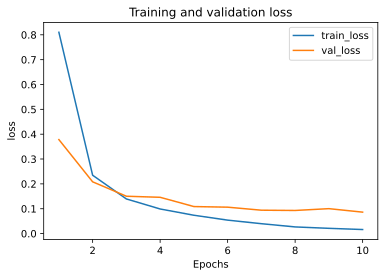

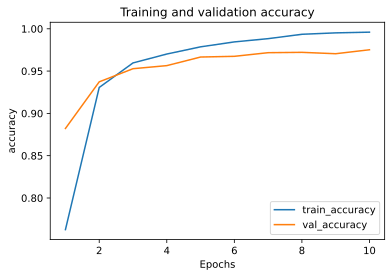

In [6]:

from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


    
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    
    
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

plot_metric(history_LeNet, 'loss')
plot_metric(history_LeNet, 'accuracy')

In [8]:
# %tensorboard --logdir logs

In [8]:
# MNIST データの読み込み
import tensorflow as tf
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(-0.5, 27.5, 27.5, -0.5)

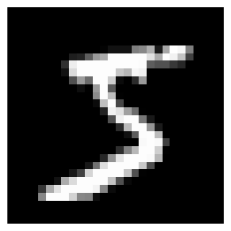

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.imshow(X_train[0], cmap='gray')
ax.axis('off')

plt.show()

In [10]:
print(y_train[0])

5


# mnist V9

In [11]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

# network and training
EPOCHS = 10
BATCH_SIZE = 256
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 2048
VALIDATION_SPLIT=0.999 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# loading MNIST dataset
# verify
# the split between train and test is 60,000, and 10,000 respectly 
# one-hot is automatically applied
mnist = keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784
RESHAPED = 784
#
X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalize in [0,1]
X_train, X_test = X_train / 255.0, X_test / 255.0
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

#one-hot
Y_train = tf.keras.utils.to_categorical(Y_train, NB_CLASSES)
Y_test = tf.keras.utils.to_categorical(Y_test, NB_CLASSES)

#build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN,
   		input_shape=(RESHAPED,),
   		name='dense_layer', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(N_HIDDEN,
   		name='dense_layer_2', activation='relu'))
model.add(keras.layers.Dropout(DROPOUT))
model.add(keras.layers.Dense(NB_CLASSES,
   		name='dense_layer_3', activation='softmax'))

# summary of the model
model.summary()

# compiling the model
model.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#training the moodel
history_mnist_V9 = model.fit(X_train, Y_train,
		batch_size=BATCH_SIZE, epochs=EPOCHS,
		verbose=VERBOSE, validation_split=VALIDATION_SPLIT)



60000 train samples
10000 test samples
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 2048)              1607680   
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 2048)              4196352   
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                20490     
Total params: 5,824,522
Trainable params: 5,824,522
Non-trainable params: 0
_________________________________________________________________
Train on 60 samples, validate on 59940 samples
Epoch 1/10
60/60 [======

In [12]:
#evalute the model
test_loss, test_acc = model.evaluate(X_test, Y_test  ,  verbose=2)
print('Test accuracy:', test_acc)

# making prediction
predictions = model.predict(X_test)

10000/1 - 0s - loss: 1.1008 - accuracy: 0.6684
Test accuracy: 0.6684


In [15]:
print('Test loss:', test_loss)

Test loss: 1.4153746558189393


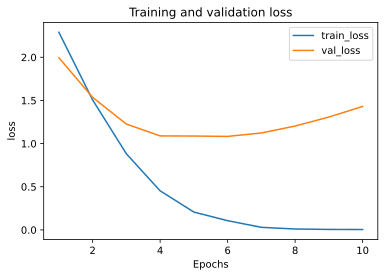

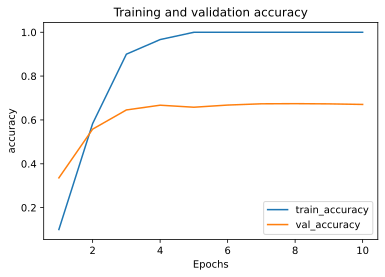

In [14]:
# Evaluate the model on the test set
# model.evaluate(X_test, y_test, verbose=2)

plot_metric(history_mnist_V9, 'loss')
plot_metric(history_mnist_V9, 'accuracy')

# Recognizing CIFAR-10 images with deep learning

The CIFAR-10 dataset contains 60,000 color images of 32×32 pixels in 3 channels,
divided in 10 classes. Each class contains 6,000 images. The training set contains
50,000 images, while the test sets provides 10,000 images.

In [11]:

# import shutil

# shutil.rmtree('./logs')

In [16]:
import tensorflow as tf
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


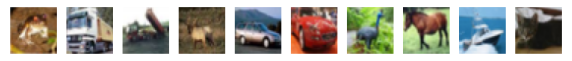

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

SZ = 10
NUM = 10

fig, ax = plt.subplots(1,NUM,figsize=(SZ,SZ * NUM))
for i in range(NUM):
    ax[i].imshow(X_train[i])
    ax[i].axis('off')

plt.show();

In [19]:
for i in range(NUM):
    print(y_train[i])

[6]
[9]
[9]
[4]
[1]
[1]
[2]
[7]
[8]
[3]


In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers

# CIFAR_10 is a set of 60K images 32x32 pixels on 3 channels
IMG_CHANNELS = 3
IMG_ROWS = 32
IMG_COLS = 32

#constant
BATCH_SIZE = 128
EPOCHS = 20
CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2
OPTIM = tf.keras.optimizers.RMSprop()

#define the convnet 
def build(input_shape, classes):
	model = models.Sequential() 
	model.add(layers.Convolution2D(32, (3, 3), activation='relu',
                        input_shape=input_shape))
	model.add(layers.MaxPooling2D(pool_size=(2, 2)))
	model.add(layers.Dropout(0.25)) 

	model.add(layers.Flatten())
	model.add(layers.Dense(512, activation='relu'))
	model.add(layers.Dropout(0.5))
	model.add(layers.Dense(classes, activation='softmax'))
	return model

# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
# normalize
X_train, X_test = X_train / 255.0, X_test / 255.0
# convert to categorical
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, CLASSES)

model=build((IMG_ROWS, IMG_COLS, IMG_CHANNELS), CLASSES)
model.summary()

# use TensorBoard, princess Aurora!
callbacks = [
  # Write TensorBoard logs to `./logs` directory
  tf.keras.callbacks.TensorBoard(log_dir='.\\logs')
]

# train
model.compile(loss='categorical_crossentropy', optimizer=OPTIM,
	metrics=['accuracy'])
 
history_CIFAR_10 = model.fit(X_train, y_train, batch_size=BATCH_SIZE,
	epochs=EPOCHS, validation_split=VALIDATION_SPLIT, 
	verbose=VERBOSE, callbacks=callbacks) 




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               3686912   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [21]:
score = model.evaluate(X_test, y_test,
                     batch_size=BATCH_SIZE, verbose=2)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])


10000/1 - 0s - loss: 1.0258 - accuracy: 0.6689

Test score: 1.031531640815735
Test accuracy: 0.6689


In [13]:
# %tensorboard --logdir logs

Using TensorFlow backend.


Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


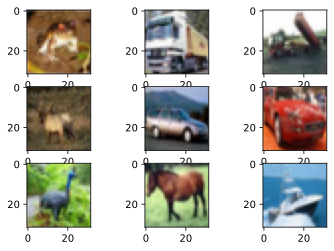

In [22]:

# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show();

10000/1 - 1s - loss: 1.0258 - accuracy: 0.6689


[1.031531633758545, 0.6689]

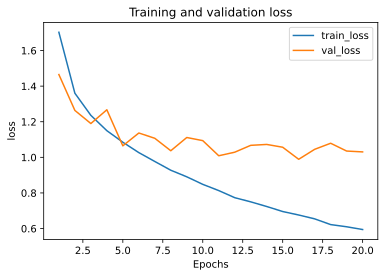

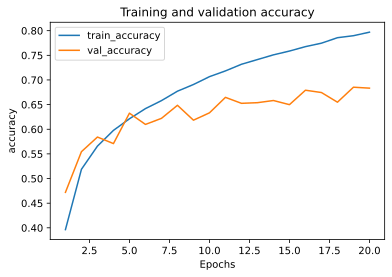

In [23]:
    
# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

plot_metric(history_CIFAR_10, 'loss')
plot_metric(history_CIFAR_10, 'accuracy')

## Improving the CIFAR-10 performance with a deeper network

One way to improve the performance is to define a deeper network with multiple
convolutional operations. In the following example we have a sequence of modules:

        1st module: (CONV+CONV+MaxPool+DropOut)
        2nd: module: (CONV+CONV+MaxPool+DropOut)
        3rd module: (CONV+CONV+MaxPool+DropOut)

In [24]:
def build_model(): 
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

    model.summary()

In [25]:

# import shutil

# shutil.rmtree('./logs')

In [26]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
 
EPOCHS=50
NUM_CLASSES = 10
BATCH_SIZE = 128
    

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test


 

(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss='categorical_crossentropy', 
            optimizer='RMSprop', 
            metrics=['accuracy'])



In [27]:
#train
batch_size = 64
cifar10_CNN_DEEP=model.fit(x_train, y_train, batch_size=batch_size,
    epochs=EPOCHS, validation_data=(x_test,y_test)) 

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 182us/sample - loss: 1.7579 - accuracy: 0.4740 - val_loss: 1.2423 - val_accuracy: 0.6078
Epoch 2/50
50000/50000 [==============================] - 7s 136us/sample - loss: 1.0774 - accuracy: 0.6517 - val_loss: 0.8957 - val_accuracy: 0.6986
Epoch 3/50
50000/50000 [==============================] - 7s 139us/sample - loss: 0.8763 - accuracy: 0.7081 - val_loss: 0.8066 - val_accuracy: 0.7297
Epoch 4/50
50000/50000 [==============================] - 7s 135us/sample - loss: 0.7525 - accuracy: 0.7454 - val_loss: 0.7464 - val_accuracy: 0.7424
Epoch 5/50
50000/50000 [==============================] - 7s 135us/sample - loss: 0.6609 - accuracy: 0.7757 - val_loss: 0.6727 - val_accuracy: 0.7770
Epoch 6/50
50000/50000 [==============================] - 6s 127us/sample - loss: 0.6042 - accuracy: 0.7917 - val_loss: 0.6019 - val_accuracy: 0.7931
Epoch 7/50
50000/50000 [==========================

In [28]:
score = model.evaluate(x_test, y_test,batch_size=batch_size , verbose=2)

10000/1 - 0s - loss: 0.5970 - accuracy: 0.8538



Test score: 0.5159447003364563
Test accuracy: 0.8538
10000/1 - 1s - loss: 1.9142 - accuracy: 0.4253


[2.073498074531555, 0.4253]

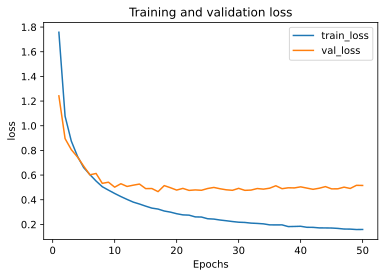

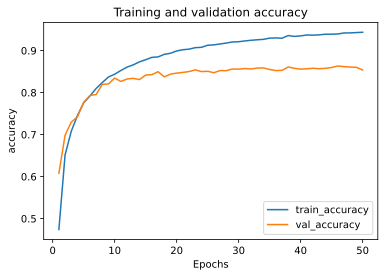

In [29]:
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

plot_metric(cifar10_CNN_DEEP, 'loss')
plot_metric(cifar10_CNN_DEEP, 'accuracy')
    


In [13]:
import numpy as np

a = np.arange(12).reshape(3,4)
print(a.shape)
print(a)

print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))
print(np.mean(a,axis=(0,1)))

(3, 4)
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
5.5
[4. 5. 6. 7.]
[1.5 5.5 9.5]
5.5


In [14]:
import numpy as np

a = np.arange(24).reshape(3,2,4)
print(a.shape)
print(a)

print(np.mean(a))
print(np.mean(a, axis=0))
print(np.mean(a, axis=1))
print(np.mean(a,axis=(0,1)))
print(np.mean(a,axis=(0,1,2)))

(3, 2, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]

 [[16 17 18 19]
  [20 21 22 23]]]
11.5
[[ 8.  9. 10. 11.]
 [12. 13. 14. 15.]]
[[ 2.  3.  4.  5.]
 [10. 11. 12. 13.]
 [18. 19. 20. 21.]]
[10. 11. 12. 13.]
11.5


# Improving the CIFAR-10 performance with data augmentation


Another way to improve the performance is to generate more images for our
training. The idea here is that we can take the standard CIFAR training set and
augment this set with multiple types of transformation, including rotation, rescaling,
horizontal or vertical flip, zooming, channel shift, and many more. Let's see the code
applied on the same network defined in the previous section:

```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#image augmentation
datagen = ImageDataGenerator(
            rotation_range=30,
            width_shift_range=0.2,
            height_shift_range=0.2,
            horizontal_flip=True,
            )
datagen.fit(x_train)
```

    - **rotation_range** is a value in degrees (0-180) for randomly rotating pictures; 
    - **width_shift** and height_shift are ranges for randomly translating pictures vertically or horizontally; 
    - **zoom_range** is for randomly zooming pictures;
    - **horizontal_flip** is or randomly flipping half of the images horizontally;  
    - **fill_mode** is the strategy used for filling in new pixels that can appear after a rotation or a shift.

In [30]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
 
EPOCHS=50
NUM_CLASSES = 10
    

def load_data():
    (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
 
    #normalize 
    mean = np.mean(x_train,axis=(0,1,2,3))
    std = np.std(x_train,axis=(0,1,2,3))
    x_train = (x_train-mean)/(std+1e-7)
    x_test = (x_test-mean)/(std+1e-7)
 
    y_train =  tf.keras.utils.to_categorical(y_train,NUM_CLASSES)
    y_test =  tf.keras.utils.to_categorical(y_test,NUM_CLASSES)

    return x_train, y_train, x_test, y_test

def build_model(): 
    model = models.Sequential()
    
    #1st blocl
    model.add(layers.Conv2D(32, (3,3), padding='same', 
        input_shape=x_train.shape[1:], activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.2))

    #2nd block
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))

    #3d block 
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.4))

    #dense  
    model.add(layers.Flatten())
    model.add(layers.Dense(NUM_CLASSES, activation='softmax'))
    return model

    model.summary()
 

(x_train, y_train, x_test, y_test) = load_data()
model = build_model()
model.compile(loss='categorical_crossentropy', 
            optimizer='RMSprop', 
            metrics=['accuracy'])

#image augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#train
batch_size = 64
cifar10_CNN_DEEP_DATA_AUGUMENT=model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                    epochs=EPOCHS,
                    verbose=1,validation_data=(x_test,y_test))
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 



Epoch 1/50
782/782 [==============================] - 49s 63ms/step - loss: 2.0389 - accuracy: 0.3719 - val_loss: 1.4490 - val_accuracy: 0.5212
Epoch 2/50
782/782 [==============================] - 48s 62ms/step - loss: 1.6108 - accuracy: 0.4906 - val_loss: 1.1518 - val_accuracy: 0.5914
Epoch 3/50
782/782 [==============================] - 51s 65ms/step - loss: 1.5584 - accuracy: 0.5211 - val_loss: 1.2305 - val_accuracy: 0.5830
Epoch 4/50
782/782 [==============================] - 49s 62ms/step - loss: 1.4667 - accuracy: 0.5560 - val_loss: 1.1715 - val_accuracy: 0.5982
Epoch 5/50
782/782 [==============================] - 51s 66ms/step - loss: 1.4333 - accuracy: 0.5709 - val_loss: 1.4276 - val_accuracy: 0.5747
Epoch 6/50
782/782 [==============================] - 48s 62ms/step - loss: 1.3618 - accuracy: 0.5871 - val_loss: 1.5462 - val_accuracy: 0.6000
Epoch 7/50
782/782 [==============================] - 47s 60ms/step - loss: 1.2907 - accuracy: 0.6080 - val_loss: 1.1550 - val_accuracy:

8414

10000/1 - 1s - loss: 0.6206 - accuracy: 0.8137

Test result: 81.370 loss: 0.607
10000/1 - 1s - loss: 1.9673 - accuracy: 0.3732


[2.143826710510254, 0.3732]

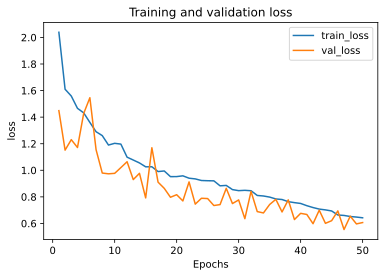

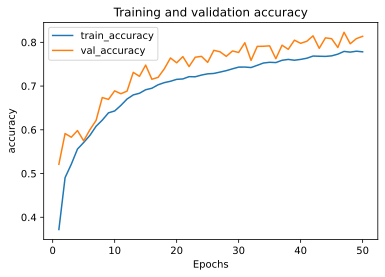

In [31]:
#test
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=2)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0])) 



# Evaluate the model on the test set
model.evaluate(X_test, y_test, verbose=2)

plot_metric(cifar10_CNN_DEEP_DATA_AUGUMENT, 'loss')
plot_metric(cifar10_CNN_DEEP_DATA_AUGUMENT, 'accuracy')
    

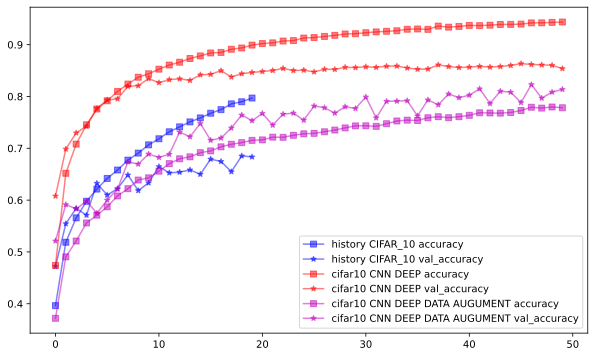

In [32]:
plt.figure(figsize=(10,6))

plt.plot(history_CIFAR_10.history['accuracy'], 'bs-', label='history CIFAR_10 accuracy', alpha=0.5)
plt.plot(history_CIFAR_10.history['val_accuracy'], 'b*-', label='history CIFAR_10 val_accuracy ', alpha=0.5)

plt.plot(cifar10_CNN_DEEP.history['accuracy'], 'rs-', label='cifar10 CNN DEEP accuracy', alpha=0.5)
plt.plot(cifar10_CNN_DEEP.history['val_accuracy'], 'r*-', label='cifar10 CNN DEEP val_accuracy', alpha=0.5)

plt.plot(cifar10_CNN_DEEP_DATA_AUGUMENT.history['accuracy'], 'ms-', label='cifar10 CNN DEEP DATA AUGUMENT accuracy', alpha=0.5)
plt.plot(cifar10_CNN_DEEP_DATA_AUGUMENT.history['val_accuracy'], 'm*-', label='cifar10 CNN DEEP DATA AUGUMENT val_accuracy', alpha=0.5)

plt.legend()
plt.show();

# Predicting with CIFAR-10
Let's suppose that we want to use the deep learning model we just trained for
CIFAR-10 for a bulk evaluation of images.

In [33]:
import numpy as np
#import scipy.misc

from skimage.transform import resize
from imageio import imread

from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

model_architecture = "model.json"
model_weights = "model.h5"
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

img_names = ["./i/cat-standing.jpg", "./i/dog.jpg"]
#imgs = [np.transpose(resize(imread(img_name), (32, 32)), (2, 0, 1)).astype("float32") 
#    for img_name in img_names]
imgs = [resize(imread(img_name), (32, 32)).astype("float32") for img_name in img_names]
imgs = np.array(imgs) / 255
print("imgs.shape:", imgs.shape)

optim = SGD()
model.compile(loss="categorical_crossentropy", optimizer=optim, metrics=["accuracy"])

predictions = model.predict_classes(imgs)
print("predictions:", predictions)

imgs.shape: (2, 32, 32, 3)
predictions: [8 8]


In [35]:
# [自習] 各画像のフォーマットを調べる
import numpy as np

from skimage.transform import resize
from imageio import imread

import tensorflow as tf
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

model_architecture = "model.json"
model_weights = "model.h5"
model = model_from_json(open(model_architecture).read())
model.load_weights(model_weights)

img_names = ["./i/cat-standing.jpg", "./i/dog.jpg"]

imgs = [imread( img_name ).astype('float32') for img_name in img_names]
for img in imgs:
    img = np.array(img)
    print(img.shape)

(536, 640, 3)
(480, 640, 3)


We get categories 3 (cat) and 5 (dog) as output as expected. We successfully created a
CNN to classify CIFAR-10 images. Next, we will look at VGG-16: a breakthrough in
deep learning.

# Very deep convolutional networks for large-scale image recognition

## VGG16_implemented by hand

In [36]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="cats_and_dogs_filtered/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="cats_and_dogs_filtered/validation", target_size=(224,224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [37]:
model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [3]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [5]:
hist = model.fit_generator(steps_per_epoch=100,generator=traindata, validation_data= testdata, validation_steps=10,epochs=50,callbacks=[checkpoint,early])

Epoch 1/50
100/100 [==============================] - 32s 321ms/step - loss: 6.1477 - accuracy: 0.5032 - val_loss: 0.6822 - val_accuracy: 0.5031
Epoch 2/50


C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
C:\Users\nemat\anaconda3\envs\tensorflow\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


100/100 [==============================] - 31s 309ms/step - loss: 0.6937 - accuracy: 0.4925 - val_loss: 0.6940 - val_accuracy: 0.4812
Epoch 3/50
100/100 [==============================] - 31s 314ms/step - loss: 0.6936 - accuracy: 0.4817 - val_loss: 0.6985 - val_accuracy: 0.5094
Epoch 4/50
100/100 [==============================] - 33s 325ms/step - loss: 0.7058 - accuracy: 0.5085 - val_loss: 0.6903 - val_accuracy: 0.5203
Epoch 5/50
100/100 [==============================] - 32s 319ms/step - loss: 0.6950 - accuracy: 0.5230 - val_loss: 0.6912 - val_accuracy: 0.5250
Epoch 6/50
100/100 [==============================] - 32s 318ms/step - loss: 0.7286 - accuracy: 0.5186 - val_loss: 0.6933 - val_accuracy: 0.4781
Epoch 7/50
100/100 [==============================] - 32s 316ms/step - loss: 0.6826 - accuracy: 0.5700 - val_loss: 0.6901 - val_accuracy: 0.5203
Epoch 8/50
100/100 [==============================] - 32s 315ms/step - loss: 0.7868 - accuracy: 0.5325 - val_loss: 0.6955 - val_accuracy: 0.5

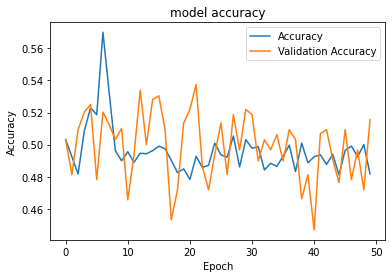

In [8]:
import matplotlib.pyplot as plt
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])

plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

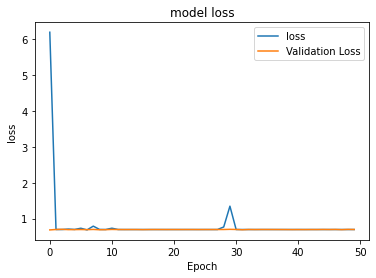

In [10]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.show()

In [12]:
model.save("vgg16_1.h5")

cat


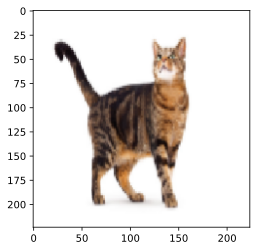

In [39]:
from keras.preprocessing import image
img = image.load_img("./i/cat.jpg",target_size=(224,224))
img = np.asarray(img)
plt.imshow(img)
img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("vgg16_1.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("cat")
else:
    print('dog');

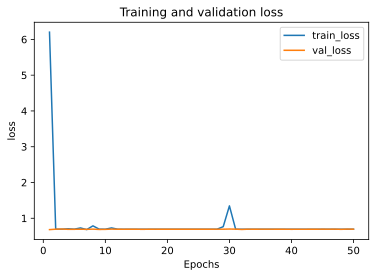

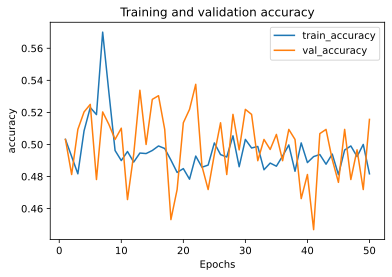

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    



# Evaluate the model on the test set
# model.evaluate(X_test, y_test, verbose=2)

plot_metric(hist, 'loss')
plot_metric(hist, 'accuracy')
    

## VGG16 implemented 2

In [40]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2, numpy as np
import os

# define a VGG16 network

def VGG_16(weights_path=None):
    model = models.Sequential()
    model.add(layers.ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.ZeroPadding2D((1,1)))
    model.add(layers.Convolution2D(512, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2,2), strides=(2,2)))

    model.add(layers.Flatten())

    #top layer of the VGG net
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1000, activation='softmax'))

    if weights_path:
        model.load_weights(weights_path)

    return model


In [41]:
import tensorflow as tf

tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [42]:
# vgg16_pretrained.py
import numpy as np
import cv2
import os


im = cv2.resize(cv2.imread( './i/cat.jpg'), (224, 224)).astype(np.float32)
print(im.shape)
im = np.expand_dims(im, axis=0)
print(im.shape)



(224, 224, 3)
(1, 224, 224, 3)


In [43]:
# Test pretrained model
path_file = os.path.join(os.path.expanduser("~"), '.keras/models/vgg16_weights_tf_dim_ordering_tf_kernels.h5')
model = VGG_16(path_file)
model.summary()
model.compile(optimizer='sgd', loss='categorical_crossentropy')
out = model.predict(im)
print(np.argmax(out))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d (ZeroPadding2 (None, 226, 226, 3)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 226, 226, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 114, 114, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 112, 112, 128)    

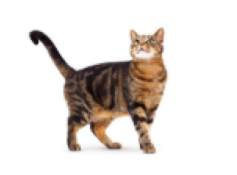

In [47]:
# matplotlib を使って画像表示する
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./i/cat.jpg')

fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(img)
ax.axis('off')
plt.show();

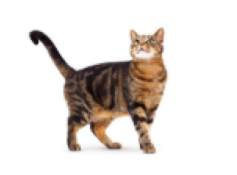

In [46]:
# OpenCV で扱う画像は RGB ではなく BGR なので変換が必要となる。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./i/cat.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # img = img[:, :, [2,1,0]] でも可
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(img)
ax.axis('off')
plt.show();

## Utilizing tf.keras built-in VGG16 Net module or vgg16_pretrained

tf.Keras applications are prebuilt and pretrained deep learning models. Weights
are downloaded automatically when instantiating a model and stored at $~/.keras/
models/$. Using built-in code is very easy:

In [48]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16(weights='imagenet', include_top=True)
# load an image from file
image = load_img('./i/steam-locomotive.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

steam_locomotive (99.99%)


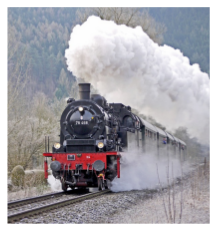

In [50]:
# OpenCV で扱う画像は RGB ではなく BGR なので変換が必要となる。
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('./i/steam-locomotive.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # img = img[:, :, [2,1,0]] でも可
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.imshow(img)
ax.axis('off')
plt.show();

## Recycling prebuilt deep learning models for extracting features
One very simple idea is to use VGG16, and more generally DCNN, for feature
extraction. This code implements the idea by extracting features from a specific layer.
Note that we need to switch to the functional API since the sequential model only
accepts layers:

In [1]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16 
from tensorflow.keras import models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

# prebuild model with pre-trained weights on imagenet
base_model = VGG16(weights='imagenet', include_top=True)
print (base_model)
for i, layer in enumerate(base_model.layers):
	print (i, layer.name, layer.output_shape)

# extract features from block4_pool block
model = models.Model(inputs=base_model.input, 
	outputs=base_model.get_layer('block4_pool').output)

img_path = './i/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# get the features from this block
features = model.predict(x)
print(features)



0 input_1 [(None, 224, 224, 3)]
1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block1_pool (None, 112, 112, 64)
4 block2_conv1 (None, 112, 112, 128)
5 block2_conv2 (None, 112, 112, 128)
6 block2_pool (None, 56, 56, 128)
7 block3_conv1 (None, 56, 56, 256)
8 block3_conv2 (None, 56, 56, 256)
9 block3_conv3 (None, 56, 56, 256)
10 block3_pool (None, 28, 28, 256)
11 block4_conv1 (None, 28, 28, 512)
12 block4_conv2 (None, 28, 28, 512)
13 block4_conv3 (None, 28, 28, 512)
14 block4_pool (None, 14, 14, 512)
15 block5_conv1 (None, 14, 14, 512)
16 block5_conv2 (None, 14, 14, 512)
17 block5_conv3 (None, 14, 14, 512)
18 block5_pool (None, 7, 7, 512)
19 flatten (None, 25088)
20 fc1 (None, 4096)
21 fc2 (None, 4096)
22 predictions (None, 1000)
[[[[  0.         0.        39.127655 ...   0.         0.
      0.      ]
   [  0.         0.         0.       ...   0.       261.40973
      0.      ]
   [  0.         0.         0.       ...   0.       376.41425
      0.      ]
   ...


You might wonder why we want to extract the features from an intermediate layer
in a DCNN. The reasoning is that as the network learns to classify images into
categories, each layer learns to identify the features that are necessary to perform
the final classification. Lower layers identify lower-order features such as color
and edges, and higher layers compose these lower-order features into higher-order
features such as shapes or objects. Hence, the intermediate layer has the capability
to extract important features from an image, and these features are more likely to
help in different kinds of classification.


This has multiple advantages. First, we can rely on publicly available large-scale
training and transfer this learning to novel domains. Second, we can save time for
expensive large training. Third, we can provide reasonable solutions even when we
don't have a large number of training examples for our domain. We also get a good
starting network shape for the task at hand, instead of guessing it.